In [0]:
import cv2
cv2.__version__

'3.4.3'

In [0]:
#![title](img/46.png)
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

![title](img/46.png)

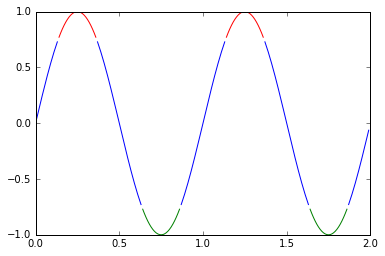

In [0]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

upper = 0.77
lower = -0.77

supper = np.ma.masked_where(s < upper, s)#(condition, a, copy=True)其中条件为True。任何屏蔽的a或条件也会在输出中被屏蔽
slower = np.ma.masked_where(s > lower, s)
smiddle = np.ma.masked_where((s < lower) | (s > upper), s)

fig, ax = plt.subplots()
ax.plot(t, smiddle, t, slower, t, supper)
plt.show()

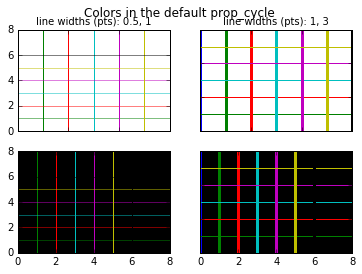

In [0]:
import numpy as np
import matplotlib.pyplot as plt


prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

lwbase = plt.rcParams['lines.linewidth']
thin = lwbase / 2
thick = lwbase * 3

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
for icol in range(2):
    if icol == 0:
        lwx, lwy = thin, lwbase
    else:
        lwx, lwy = lwbase, thick
    for irow in range(2):
        for i, color in enumerate(colors):
            axs[irow, icol].axhline(i, color=color, lw=lwx)
            axs[irow, icol].axvline(i, color=color, lw=lwy)

    axs[1, icol].set_facecolor('k')
    axs[1, icol].xaxis.set_ticks(np.arange(0, 10, 2))
    axs[0, icol].set_title('line widths (pts): %g, %g' % (lwx, lwy),
                           fontsize='medium')

for irow in range(2):
    axs[irow, 0].yaxis.set_ticks(np.arange(0, 10, 2))

fig.suptitle('Colors in the default prop_cycle', fontsize='large')

plt.show()

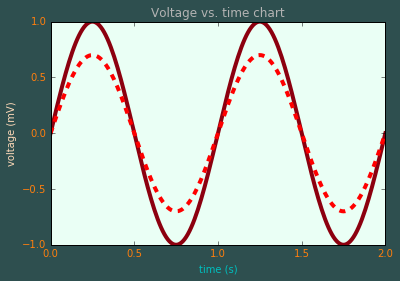

In [0]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0.0, 2.0, 201)
s = np.sin(2 * np.pi * t)

# 1) RGB tuple:
fig, ax = plt.subplots(facecolor=(.18, .31, .31))
# 2) hex string:
ax.set_facecolor('#eafff5')
# 3) gray level string:
ax.set_title('Voltage vs. time chart', color='0.7')
# 4) single letter color string
ax.set_xlabel('time (s)', color='c')
# 5) a named color:
ax.set_ylabel('voltage (mV)', color='peachpuff')
# 6) a named xkcd color:
ax.plot(t, s, 'xkcd:crimson')
# 7) Cn notation:
ax.plot(t, .7*s, color='C4', linestyle='--')
# 8) tab notation:
ax.tick_params(labelcolor='tab:orange')


plt.show()

In [0]:
# Matplotlib为您提供了8种指定颜色的方法：

# 在[0, 1]中的浮点值的RGB或RGBA元组（例如 (0.1, 0.2, 0.5) 或 (0.1, 0.2, 0.5, 0.3)）。RGBA是红色，绿色，蓝色，Alpha的缩写;
# 十六进制RGB或RGBA字符串 (例如： '#0F0F0F' 或者 '#0F0F0F0F')；
# [0, 1]中浮点值的字符串表示，包括灰度级（例如，'0.5'）；
# 单字母字符串，例如这些其中之一：{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
# 一个 X11/CSS4 ("html") 颜色名称, 例如："blue";
# 来自xkcd的颜色调研的名称，前缀为 'xkcd:' (例如：“xkcd:sky blue”)；
# 一个 “Cn” 颜色规范，即 'C' 后跟一个数字，这是默认属性循环的索引（matplotlib.rcParams['axes.prop_cycle']）; 索引在艺术家对象创建时
# 发生，如果循环不包括颜色，则默认为黑色。
# 其中一个 {'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 
#       'tab:olive', 'tab:cyan'}，它们是'tab10'分类调色板中的Tableau颜色（这是默认的颜色循环）;

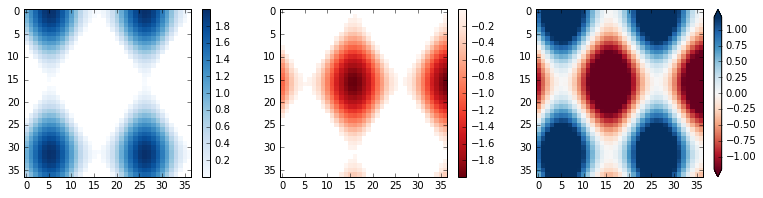

In [0]:
#https://my.oschina.net/u/2474629/blog/1800096 介紹imshow
# masked_values
# 使用浮点平等的掩码。
# masked_equal
# 掩码等于给定值。
# masked_not_equal
# 其中不等于给定值的掩码。
# masked_less_equal
# 掩码小于或等于给定值。
# masked_greater_equal
# 掩码大于或等于给定值。
# masked_less
# 掩码小于给定值。
# masked_greater
# 掩码大于给定值。
# masked_inside
# 给定间隔内的掩码。
# masked_outside
# 在给定间隔之外屏蔽。
# masked_invalid
# 屏蔽无效值（NaN或infs）。

import numpy as np
import matplotlib.pyplot as plt

# setup some generic data
N = 37
x, y = np.mgrid[:N, :N]
Z = (np.cos(x*0.2) + np.sin(y*0.3))

# mask out the negative and positive values, respectively
Zpos = np.ma.masked_less(Z, 0)
Zneg = np.ma.masked_greater(Z, 0)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
pos = ax1.imshow(Zpos, cmap='Blues', interpolation='none')

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax1)

# repeat everything above for the negative data
neg = ax2.imshow(Zneg, cmap='Reds_r', interpolation='none')
fig.colorbar(neg, ax=ax2)

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = ax3.imshow(Z, cmap='RdBu', vmin=-1.2, vmax=1.2,
                             interpolation='none')
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
#cbar.minorticks_on()
plt.show()

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


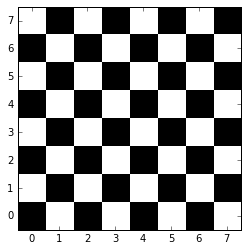

In [0]:
import matplotlib.pyplot as plt
import numpy as np


# extent = (-3,1,-3,1)
fig = plt.figure(frameon=False)

data = np.add.outer(range(8), range(8)) % 2
print (data)
# plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest',extent=extent)
# plt.imshow(data, cmap=plt.cm.gray, interpolation='bilinear',extent=extent)
# plt.imshow(data, cmap=plt.cm.gray, interpolation='bicubic',extent=extent)
# plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest',origin="lower")


plt.savefig("gray.png")
plt.show()

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
[[ 1.76476966  0.40379068  2.68578959  2.5581473   0.02614149  1.30402739
   0.34991001  1.16472133]
 [ 1.97299306  2.25971496  0.45348221  2.28721208  1.08744139  2.34259782
   2.16481688  0.69216745]
 [ 2.08055851  1.0745721   2.36766057  1.05279738  2.3668175   2.12193626
   2.40985412  0.51964154]
 [ 1.92572567  1.78193849  0.46375053  2.1487364   0.096963    1.09395005
   0.64016368  1.89403289]
 [ 0.50361992  0.1275457   0.22178217  0.22368918  0.56210027  0.85461339
   0.62824798  2.05944507]
 [ 1.9562814   0.39808523  2.03908907  0.17811446  2.17443629  2.54493134
   0.71474497  1.93458881]
 [ 2.69002915  1.04284774  2.73183269  0.29158405  1.09684586  2.29534906
   1.02048114  0.8526086 ]
 [ 2.14738005  0.36847584  2.03580914  1.73134185  1.294906    2.83217954
   0.27503361  2.51972926]]


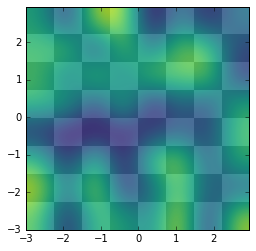

In [0]:
import matplotlib.pyplot as plt
import numpy as np


dx, dy = 0.05, 0.05

x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)


extent = np.min(x), np.max(x), np.min(y), np.max(y)
# extent = (-3,1,-3,1)
fig = plt.figure(frameon=False)

dataBase = np.add.outer(range(8), range(8)) % 2
print (dataBase)
plt.imshow(dataBase, cmap=plt.cm.gray, interpolation='nearest',extent=extent)
# plt.imshow(dataBase, cmap=plt.cm.gray, interpolation='bilinear',extent=extent)
# plt.imshow(dataBase, cmap=plt.cm.gray, interpolation='bicubic',extent=extent)
# plt.imshow(dataBase, cmap=plt.cm.gray, interpolation='nearest')

dataForeign = np.random.rand(8,8)*3
print (dataForeign)
# plt.imshow(dataForeign, cmap=plt.cm.viridis, alpha=0.9, interpolation='bilinear',extent=extent)
plt.imshow(dataForeign, cmap=plt.cm.viridis, alpha=0.9, interpolation='bicubic',extent=extent)

plt.savefig("viridis.png")
plt.show()

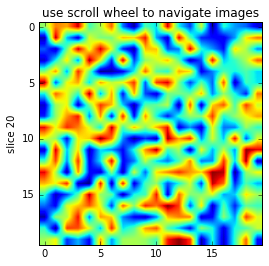

In [0]:
#Image Slices Viewer
import numpy as np
import matplotlib.pyplot as plt


class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()


fig, ax = plt.subplots(1, 1)

X = np.random.rand(20, 20, 40)

tracker = IndexTracker(ax, X)


fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [0]:
#conda install -c conda-forge basemap-data-hires
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',
            llcrnrlat = 25,
            llcrnrlon = -130,
            urcrnrlat = 50,
            urcrnrlon = -60,
            resolution='l')

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')
#m.drawcounties(color='darkred')
#m.fillcontinents()
#m.etopo()
#m.bluemarble()

xs = []
ys = []

NYClat, NYClon = 40.7127, -74.0059
xpt, ypt = m(NYClon, NYClat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt, ypt, 'c*', markersize=15)

LAlat, LAlon = 34.05, -118.25
xpt, ypt = m(LAlon, LAlat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt, ypt, 'g^', markersize=15)

m.plot(xs, ys, color='r', linewidth=3, label='Flight 98')
m.drawgreatcircle(NYClon, NYClat, LAlon, LAlat, color='c', linewidth=3, label='Arc')


plt.legend(loc=4)
plt.title('Basemap Tutorial')
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

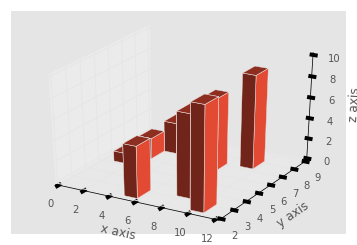

In [0]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,6,7,8,9,10]
y3 = [5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(x3, y3, z3, dx, dy, dz)


ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()